<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape #979 rows, 6 columns

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
print(movies.loc[:, ['title', 'duration']].sort_values(by='duration').head())
print(movies.loc[:, ['title', 'duration']].sort_values(by='duration').tail())

                           title  duration
389                       Freaks        64
338          Battleship Potemkin        66
258  The Cabinet of Dr. Caligari        67
293                    Duck Soup        68
88                       The Kid        68
                                 title  duration
445               The Ten Commandments       220
142  Lagaan: Once Upon a Time in India       224
78         Once Upon a Time in America       229
157                 Gone with the Wind       238
476                             Hamlet       242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

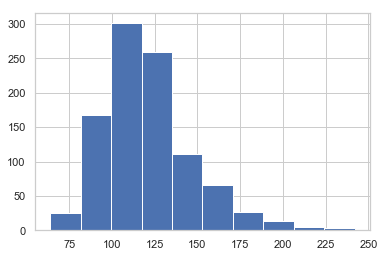

In [7]:
# Answer:
movies.loc[:, 'duration'].hist(bins=10)

#### Use a box plot to display that same data.

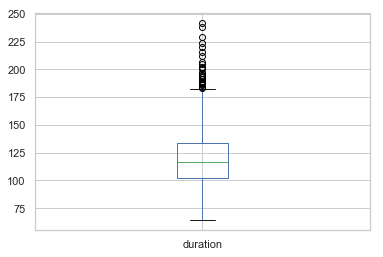

In [8]:
# Answer:
movies.loc[:, 'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
movies.loc[:, 'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Content rating')

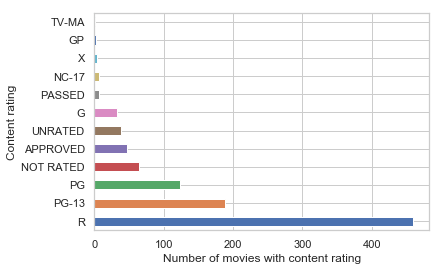

In [10]:
# Answer:
ax = movies.loc[:, 'content_rating'].value_counts().plot(kind='barh')
ax.set_xlabel('Number of movies with content rating')
ax.set_ylabel('Content rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
ratings_to_unrated = (movies.loc[:, 'content_rating'] == 'NOT RATED') | (movies.loc[:, 'content_rating'] == 'APPROVED') | (movies.loc[:, 'content_rating'] == 'PASSED') | (movies.loc[:, 'content_rating'] == 'GP')
movies.loc[ratings_to_unrated, 'content_rating'] = 'UNRATED'

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
ratings_to_nc17 = (movies.loc[:, 'content_rating'] == 'X') | (movies.loc[:, 'content_rating'] == 'TV-MA')
movies.loc[ratings_to_nc17, 'content_rating'] = 'NC-17'

#### Count the number of missing values in each column.

In [13]:
# Answer: By comparing the number of non-null entries to the total entries, you can view missing values. For instance, 'content_rating' is missing 3 values
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
# Answer:
movies.loc[movies.loc[:, 'content_rating'].isnull(), :].head()

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [15]:
movies.loc[movies.loc[:, 'content_rating'].isnull(), 'content_rating'] = 'UNKNOWN' 

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
# Answer:
long_rating = {movies.loc[movies.loc[:, 'duration'] >= 120, 'star_rating'].mean()}
short_rating = {movies.loc[movies.loc[:, 'duration'] < 120, 'star_rating'].mean()}
print(f'Movies longer than two hours have an average rating of {long_rating}, compared to an average rating of {short_rating} for movies shorter than two hours')

Movies longer than two hours have an average rating of {7.948898678414082}, compared to an average rating of {7.838666666666657} for movies shorter than two hours


#### Use a visualization to detect whether there is a relationship between duration and star rating.

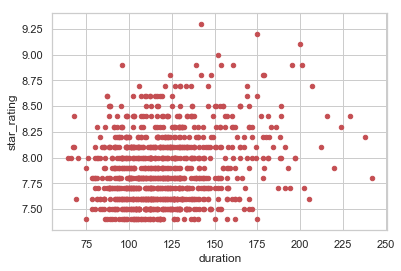

In [17]:
# Answer: If there's a relationship, it is very very weak
movies.plot(kind='scatter', x='duration', y='star_rating', c='r')

#### Calculate the average duration for each genre.

In [18]:
# Answer:
movies.groupby('genre').agg({'duration' : 'mean'})

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


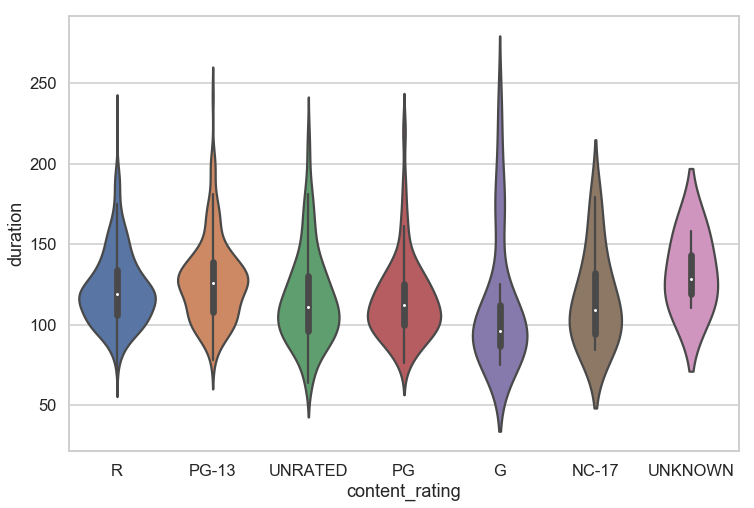

In [19]:
# Answer:
sns.set_context('talk')
plt.figure(figsize=(12,8))
ax = sns.violinplot(x='content_rating', y='duration', data=movies)

#### Find the title of the movie with the highest star rating in each genre

In [20]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [21]:
# Answer:
movies.groupby('genre').agg({'star_rating':'max'}).merge(movies, on=['genre', 'star_rating'])

,genre,star_rating,title,content_rating,duration,actors_list
0,Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
1,Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
2,Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
3,Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
4,Comedy,8.6,Life Is Beautiful,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
5,Comedy,8.6,City Lights,UNRATED,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
6,Comedy,8.6,Modern Times,G,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
7,Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
8,Drama,8.9,12 Angry Men,UNRATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,Drama,8.9,Fight Club,R,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [22]:
# Answer: All of the movies appear to be distinct
movies.loc[:, 'title'].value_counts() > 1
relevant_movies = (movies.loc[:, 'title'] == 'True Grit') | (movies.loc[:, 'title'] == 'Dracula') | (movies.loc[:, 'title'] == 'Les Miserables') | (movies.loc[:, 'title'] == 'The Girl with the Dragon Tattoo')
movies.loc[relevant_movies, :]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNKNOWN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [23]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [24]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [25]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [26]:
# Answer: It's technically the other way I think, filtering by count and then aggregating by count and mean, but it still works
movies.groupby('genre').filter(lambda genre: len(genre) >= 10).groupby('genre').agg({'star_rating':['count', 'mean']})

star_rating          
                count      mean
genre                          
Action            136  7.884559
Adventure          75  7.933333
Animation          62  7.914516
Biography          77  7.862338
Comedy            156  7.822436
Crime             124  7.916935
Drama             278  7.902518
Horror             29  7.806897
Mystery            16  7.975000

## Bonus

#### Figure out something "interesting" using the actors data!